## Necessary Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import find_peaks
from datetime import datetime, timedelta

## Read the Dataframe and Index

In [4]:
df = pd.read_csv("../Data/YH_LHF.csv", index_col='Date')
df.index = pd.to_datetime(df.index)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.iloc[::-1]
df = df[df.index < '2024-01-01']

df = df.interpolate()  # Interpolates missing values linearly
df = df.dropna()       # Drops any remaining NA values

df.head()

C:\Users\ldolvin\AppData\Local\Temp\ipykernel_54624\3105570913.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()  # Interpolates missing values linearly


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-03-04,59.70,59.88,59.6,59.65,59.65,-
2002-03-05,59.15,59.15,58.7,58.80,58.80,-
2002-03-06,58.50,58.80,57.7,57.70,57.70,-
2002-03-07,58.20,58.60,58.0,58.40,58.40,-
2002-03-08,58.25,58.25,57.9,58.05,58.05,-


## EDA

In [5]:
# Creating an interactive plot
fig = go.Figure(data=[go.Scatter(x=df.index, y=df['Adj Close'], mode='lines')])

# Update layout for a better visual appearance
fig.update_layout(
    title='Adjusted Close Price Over Time',
    xaxis_title='Date',
    yaxis_title='Adjusted Close Price',
    hovermode='closest'  # Show closest data point on hover
)

# Show the figure
fig.show()

In [6]:
# Creating an interactive plot
fig = go.Figure(data=[go.Scatter(x=df.index, y=df['Volume'], mode='lines')])

# Update layout for a better visual appearance
fig.update_layout(
    title='Volume Over Time',
    xaxis_title='Date',
    yaxis_title='Volume',
    hovermode='closest'  # Show closest data point on hover
)

# Show the figure
fig.show()

Peak Dates:
2002-06-25
2003-06-26
2004-07-02
2005-07-06
2006-07-06
2007-07-06
2008-07-07
2009-07-07
2010-07-08
2011-07-07
2012-07-06
2013-07-10
2014-07-10
2015-07-10
2016-07-11
2017-07-13
2018-07-13
2019-07-16
2020-07-15
2021-07-15
2022-07-21
2023-07-24

Trough Dates:
2002-10-22
2003-10-28
2004-10-29
2005-11-01
2006-11-01
2007-11-01
2008-10-31
2009-11-02
2010-11-03
2011-11-02
2012-11-05
2013-11-05
2014-11-05
2015-11-05
2016-11-07
2017-11-08
2018-11-08
2019-11-11
2020-11-10
2021-11-10
2022-11-16
2023-11-17


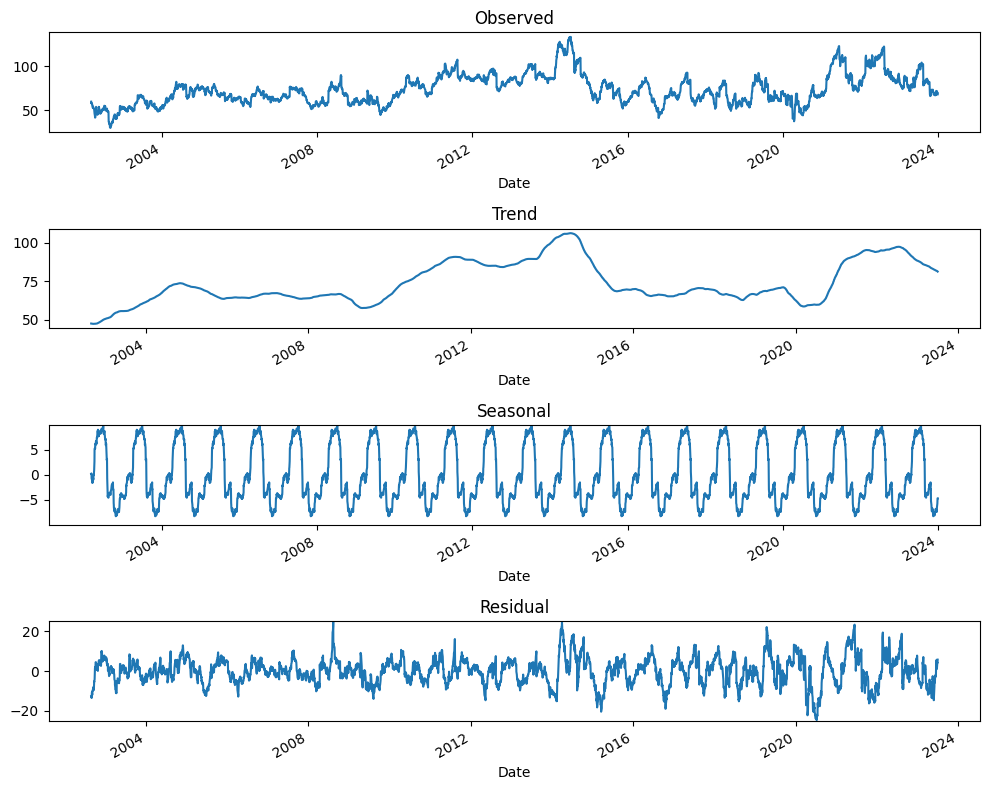

In [7]:
result = seasonal_decompose(df['Adj Close'], model='additive', period=252)

# Extract the seasonal component
seasonal = result.seasonal

# Initialize lists to store peak and trough dates
peak_dates = []
trough_dates = []

# Loop through each year in the data
for year in range(seasonal.index.year.min(), seasonal.index.year.max() + 1):
    # Extract the seasonal component for the current year
    yearly_seasonal = seasonal[seasonal.index.year == year]
    
    # Find peaks (local maxima) within the current year
    peaks, _ = find_peaks(yearly_seasonal)
    if peaks.size > 0:
        peak_date = yearly_seasonal.index[peaks[np.argmax(yearly_seasonal.iloc[peaks])]]
        peak_dates.append(peak_date)
    
    # Find troughs (local minima) within the current year
    troughs, _ = find_peaks(-yearly_seasonal)
    if troughs.size > 0:
        trough_date = yearly_seasonal.index[troughs[np.argmin(yearly_seasonal.iloc[troughs])]]
        trough_dates.append(trough_date)

# Print the dates
print("Peak Dates:")
for date in peak_dates:
    print(date.strftime('%Y-%m-%d'))

print("\nTrough Dates:")
for date in trough_dates:
    print(date.strftime('%Y-%m-%d'))
# Plotting with adjustments
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

# Dynamic y-axis limits based on actual data ranges
seasonal_limit = max(abs(result.seasonal.min()), abs(result.seasonal.max()))
resid_limit = max(abs(result.resid.min()), abs(result.resid.max()))

# Adjusting the y-axis scale for seasonal and residual if necessary
axes[2].set_ylim(-seasonal_limit, seasonal_limit)  # Adjust to fit the seasonal data
axes[3].set_ylim(-resid_limit, resid_limit)  # Adjust to fit the residual data

plt.tight_layout()
plt.show()

In [8]:
# Extract the seasonal component
seasonal = result.seasonal

# Initialize lists to store peak and trough dates
peak_dates = []
trough_dates = []

# Loop through each year in the data
for year in range(seasonal.index.year.min(), seasonal.index.year.max() + 1):
    # Extract the seasonal component for the current year
    yearly_seasonal = seasonal[seasonal.index.year == year]
    
    # Find peaks (local maxima) within the current year
    peaks, _ = find_peaks(yearly_seasonal)
    if peaks.size > 0:
        peak_date = yearly_seasonal.index[peaks[np.argmax(yearly_seasonal.iloc[peaks])]]
        peak_dates.append(peak_date)
    
    # Find troughs (local minima) within the current year
    troughs, _ = find_peaks(-yearly_seasonal)
    if troughs.size > 0:
        trough_date = yearly_seasonal.index[troughs[np.argmin(yearly_seasonal.iloc[troughs])]]
        trough_dates.append(trough_date)

# Convert dates to day of year
peak_days = [date.timetuple().tm_yday for date in peak_dates]
trough_days = [date.timetuple().tm_yday for date in trough_dates]

# Calculate average day of year
avg_peak_day = int(np.mean(peak_days))
avg_trough_day = int(np.mean(trough_days))

# Convert average day of year back to a date (choosing a non-leap year for consistency)
reference_year = 2000  # Non-leap year to avoid complications with Feb 29
avg_peak_date = datetime(reference_year, 1, 1) + timedelta(days=avg_peak_day - 1)
avg_trough_date = datetime(reference_year, 1, 1) + timedelta(days=avg_trough_day - 1)

# Print the average dates
print("Average Peak Date:", avg_peak_date.strftime('%Y-%m-%d'))
print("Average Trough Date:", avg_trough_date.strftime('%Y-%m-%d'))

Average Peak Date: 2000-07-08
Average Trough Date: 2000-11-03


## Backtesting

In [9]:
def backtest(df, buy, sell):
    df['pct_change'] = df['Adj Close'].pct_change()
    df = df.iloc[1:, :]
    return_list =[]
    date_list = []

    for i, row in df.iterrows():
        # Extract the month and day from the index
        temp = datetime(year=1904, month=i.month, day=i.day)
        # Check if the date is between the start and end dates
        if sell <= temp < buy:
            return_list.append(-1*row['pct_change'])
            date_list.append(i)
        else:
            return_list.append(row['pct_change'])
            date_list.append(i)
    
    return_df = pd.DataFrame({'date': date_list, 'return': return_list}, columns=['date', 'return'])
    return_df.set_index('date')
 
    return return_df

In [10]:
sell = datetime(year=1904, month=7, day=8)
buy = datetime(year=1904, month=11, day=3)
return_df = backtest(df, buy, sell)
return_df.head()

,date,return
0,2002-03-05,-0.014250
1,2002-03-06,-0.018707
2,2002-03-07,0.012132
3,2002-03-08,-0.005993
4,2002-03-11,-0.008096


In [11]:
total_return = 1
for i, row in return_df.iterrows():
    total_return *= (1 + row['return'])
total_return = (total_return - 1)
print(f"Total Return: {'%.2f' % total_return}%, Std Dev: {'%.4f' % return_df['return'].std()}, Sharpe: {'%.2f' % (total_return/return_df['return'].std())}")

Total Return: 3325.67%, Std Dev: 0.0240, Sharpe: 138646.84


In [12]:
yearly_avg = (total_return + 1)**(1/22)-1
print(f"Annual Return: {yearly_avg*100}%")

Annual Return: 44.57439307714424%


## Adjusted Close vs Close

In [13]:
for i, row in df.iterrows():
    if row['Close'] != row['Adj Close']:
        print("DIFFERENCE:", row)